In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
from fastai.vision import *

Updating fastai...
Done.


In [0]:
from google.colab import drive, files
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
folder = 'computer'
file = 'urls_computer_mouse.txt'

In [0]:
folder = 'animal'
file = 'urls_animal_mouse.csv'

In [0]:
path = Path(base_dir + 'data/mouses')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
#download_images(path/file, dest, max_pics=200)

In [0]:
classes= ['computer', 'animal']

In [0]:
for c in classes:
   print(c)
   verify_images(path/c, delete=True, max_size=500)

computer


animal


In [0]:
np.random.seed(420)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [0]:
data.classes

['animal', 'computer', 'mickey']

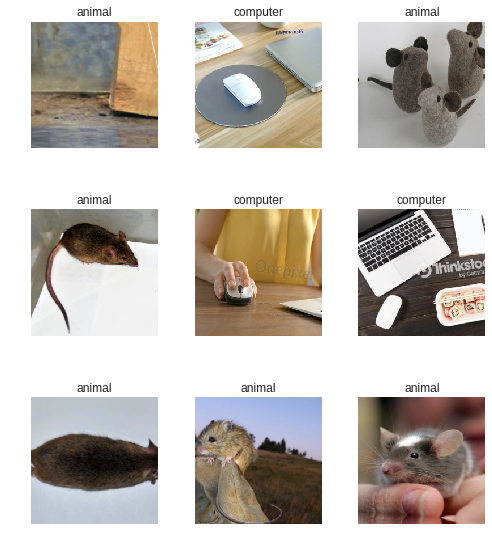

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
len(data.valid_ds), len(data.train_ds)

(43, 176)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.382704,1.035073,0.465116
2,0.924475,0.335140,0.116279
3,0.688652,0.182906,0.046512
4,0.550634,0.137943,0.046512


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

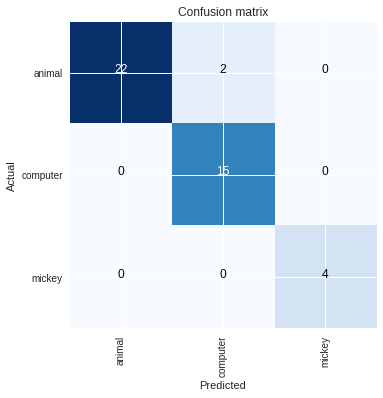

In [0]:
interp.plot_confusion_matrix()

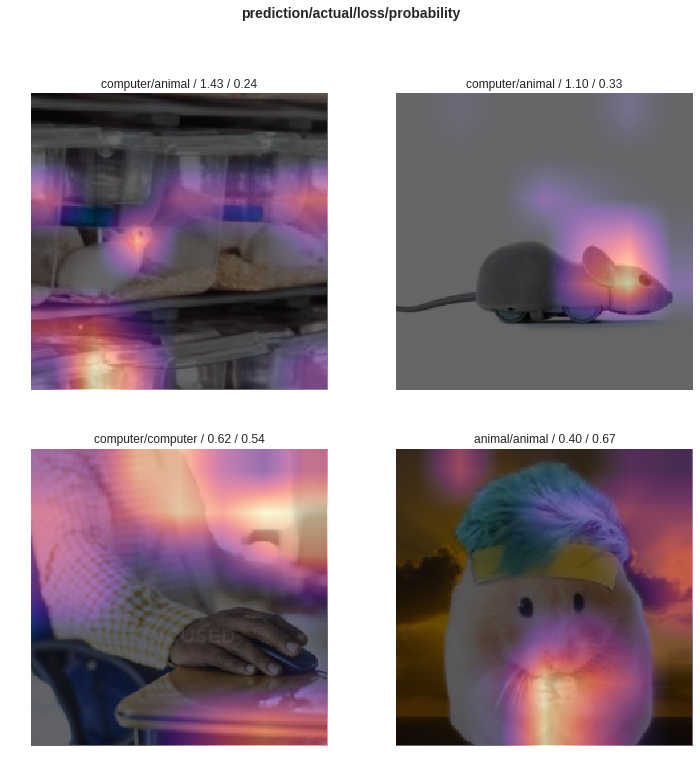

In [0]:
interp.plot_top_losses(4)


In [0]:
learn.export()